In [1]:
# import relevant libraries
import numpy as np
import pandas as pd
import csv
from sklearn import cluster

In [2]:
# load the data into a numpy array
data = None
with open('../quant_spec_coding/data/dataClustering.csv', 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
data = np.array(data, dtype=float)
data

array([[  5.64072013,   9.1801827 ,  10.28866117, ..., -10.19915415,
          0.36604256,   9.13270389],
       [  7.96213717,   4.39077939,   6.51351436, ...,  -7.50608486,
         -0.56584195,  10.02400647],
       [ -0.29981942,  -3.56693104,  -5.83650755, ...,  -4.21298313,
          6.04998347, -10.13094085],
       ...,
       [  1.69282663,  -3.22963292,  -5.8509819 , ...,  -0.8997377 ,
          5.13922675,  -9.51099456],
       [ -3.73420474,   5.84581368,  -0.04579228, ..., -10.8797207 ,
          6.34242545,  -3.86683827],
       [ -4.5212347 ,  -8.65186656,   3.79946441, ...,  10.85236389,
         -2.47187278,   2.87978098]])

Text(0, 0.5, 'Sum of Squared Error(inertia)')

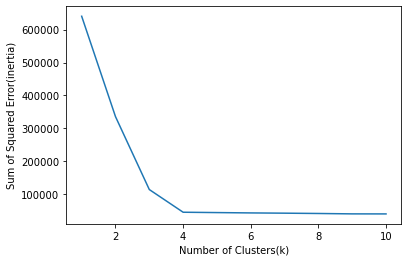

In [3]:
# Determine the optimal number of clusters for the data. Here, we'll use the "elbow" method, in which k-means
# clustering will be applied with varying numbers of clusters and the resulting Sum of Squared Errors(sum of 
# the distances between the samples and their closest centroids; also known as inertia) will be plotted against
# the number of clusters(k). The "elbow" of this plot(the point after which the graph starts becoming linear) will
# be the optimal number of clusters
import matplotlib.pyplot as plt
%matplotlib inline

num_clusters = [x for x in range(1, 11)]
SSE = []
for k in num_clusters:
    k_means = cluster.KMeans(n_clusters=k, n_init='auto')
    k_means.fit(data)
    SSE.append(k_means.inertia_)
plt.plot(num_clusters, SSE)
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Squared Error(inertia)')

In [4]:
# As we can see from the plot above, the optimal number of clusters for this dataset is k=4. We can now apply
# k-means clustering with this hyperparameter
k_means = cluster.KMeans(n_clusters=4, n_init='auto')
k_means.fit(data)
labels = k_means.labels_
labels

array([1, 1, 0, ..., 0, 3, 2], dtype=int32)

In [20]:
# Now that we have the clustering labels, we can build the labelled dataset by assigning each sample to its
# relevant cluster label(Cluster 0, Cluster 1, Cluster 2, or Cluster 3)
# labelled_samples = [ (label, data[index]) for index, label in enumerate(labels) ]
# labelled_df = pd.DataFrame(labelled_samples, columns=['Cluster ID', 'Sample'])
# labelled_df

In [21]:
# Now we can build the Multinomial Regression model used as a benchmark for the classification. First, we will
# import the relevant libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [55]:
# Next, we will perform a 70/30 train/test split on the data to ensure that we are avoiding overfitting. Here,
# 70% of the data will be used as a training set for the classifiers and 30% of the data will be used as a test
# set
# predictors = ['Sample']
# target = ['Cluster ID']
X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=0.7)
X_train

array([[ 3.22704197, -5.16383282, -3.8576467 , ..., -6.66271745,
         6.5780077 , -7.47941791],
       [-3.54926083, -7.88487144,  2.73735531, ...,  8.26154458,
        -0.66991817,  3.25733349],
       [ 2.97263992, -2.53970396, -4.60755638, ..., -1.98670804,
         3.91671644, -8.18901886],
       ...,
       [-6.16982387, -8.01760997,  5.23659023, ...,  8.46631634,
         0.73795921,  4.46837715],
       [-0.69953588,  7.48304614, -1.16254811, ..., -5.43660496,
         5.07595123, -6.5452727 ],
       [ 5.01499004,  4.20095036,  9.0846684 , ..., -9.38555639,
        -0.04440143, 11.94502112]])

In [56]:
# Fit Multinomial regression model using data and class labels from the training set
mlr = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty=None).fit(X_train, y_train)

In [57]:
# Print information about the regression, including coefficients, class info, intercepts, and number of features seen
print("Classes:", mlr.classes_)
print("-"*40)
print("Coefficients:", mlr.coef_)
print("-"*40)
print("Intercepts:", mlr.intercept_)
print("-"*40)
print("Number of features seen:", mlr.n_features_in_)

Classes: [0 1 2 3]
----------------------------------------
Coefficients: [[ 1.31228326 -0.72194801 -1.09000438 -1.18481455  0.56074067 -0.06010473
  -0.60684003 -1.37001928]
 [ 0.26246985  0.1848982   0.59540705  0.38780547  0.58573775 -0.64254889
  -0.02529023  0.73817897]
 [-0.152735   -0.86035482  0.22974636 -0.43791927  1.51423884  0.597645
   0.1932035   0.49351157]
 [-1.42201811  1.39740463  0.26485097  1.23492835 -2.66071726  0.10500862
   0.43892675  0.13832874]]
----------------------------------------
Intercepts: [-0.24727705  0.16899298  0.34338477 -0.2651007 ]
----------------------------------------
Number of features seen: 8


In [59]:
# Predict and compute classification scores and confusion matrix for the Multinomial regression
y_pred = mlr.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Confusion Matrix for Multinomial:\n", confusion)
print("-"*40)
print("Report for Multinomial:\n", report)

Confusion Matrix for Multinomial:
 [[178   0   0   0]
 [  0 187   0   0]
 [  0   0 184   0]
 [  0   0   0 201]]
----------------------------------------
Report for Multinomial:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       1.00      1.00      1.00       187
           2       1.00      1.00      1.00       184
           3       1.00      1.00      1.00       201

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



In [60]:
# Build Decision Tree classifier for comparison
from sklearn.tree import DecisionTreeClassifier
t = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_tree = t.predict(X_test)
confusion_tree = confusion_matrix(y_test, y_pred_tree)
report_tree = classification_report(y_test, y_pred_tree)
print("Confusion Matrix for Tree:\n", confusion_tree)
print("-"*40)
print("Report for Tree:\n", report_tree)

Confusion Matrix for Tree:
 [[178   0   0   0]
 [  4 183   0   0]
 [  0   0 184   0]
 [  1   0   0 200]]
----------------------------------------
Report for Tree:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       178
           1       1.00      0.98      0.99       187
           2       1.00      1.00      1.00       184
           3       1.00      1.00      1.00       201

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750

